In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt  # <-- Required
from matplotlib.animation import FuncAnimation, PillowWriter


In [8]:
%matplotlib notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


In [9]:
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=20,
    random_state=13
)


In [10]:
X.shape, y.shape

((100, 1), (100,))

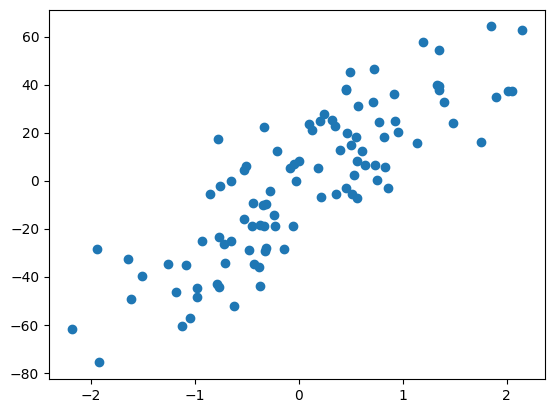

In [11]:
plt.scatter(X, y)
plt.show()

In [14]:
# flatten X to avoid shape errors
X = X.ravel()

b = -520
m = 600
lr = 0.001

all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0

    for j in range(len(X)):
        slope_b += -2 * (y[j] - (m * X[j]) - b)
        slope_m += -2 * (y[j] - (m * X[j]) - b) * X[j]
        cost += (y[j] - (m * X[j]) - b)**2

    b -= lr * slope_b
    m -= lr * slope_m

    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)


In [17]:
pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


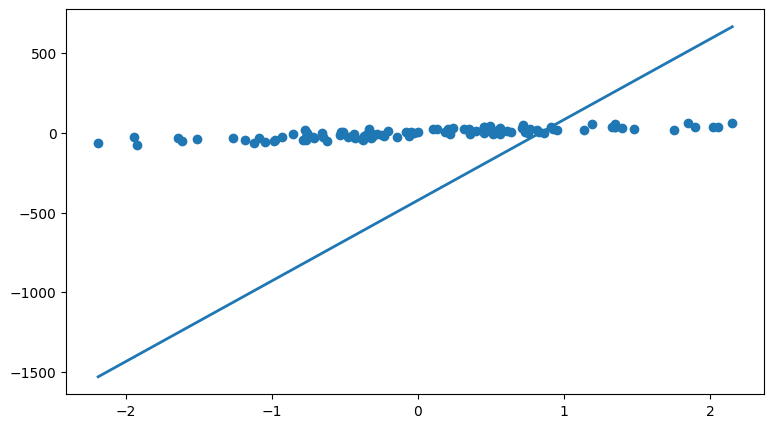

In [6]:
# Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from matplotlib.animation import FuncAnimation

# Step 2: Generate data
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=20,
    random_state=13
)

X = X.reshape(-1, 1)   # Ensure correct shape

# Step 3: Gradient Descent
b = -520
m = 600
lr = 0.001

all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] - b)**2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)

    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

# Step 4: Animation
fig, ax = plt.subplots(figsize=(9,5))

ax.scatter(X, y)
x_i = np.linspace(min(X), max(X), 100)
line, = ax.plot(x_i, x_i*all_m[0] + all_b[0], linewidth=2)

def update(i):
    line.set_ydata(x_i * all_m[i] + all_b[i])
    ax.set_xlabel(f"epoch {i+1}")

anim = FuncAnimation(fig, update, frames=epochs, interval=500)
plt.show()
